In [87]:

import numpy as np
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
%matplotlib inline
import os



import  seaborn as sn
import cv2

In [88]:

train_path = 'C:\\Users\\soumy\\Documents\\Coading\\Q2\\'
val_path = 'C:\\Users\\soumy\\Documents\\Coading\\Q2\\'


In [89]:
#looping through each train folder
img_size = (32, 32)

images_t = []
labels_t = []

for label in range(10):
    folder_path = os.path.join(train_path, 'train', str(label))

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):

            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)

            images_t.append(img)
            labels_t.append(label)

images = np.array(images_t)
labels = np.array(labels_t)

np.save('x_train.npy', images_t)
np.save('y_train.npy', labels_t)

In [90]:
#looping through each val folder and storing the images as a numpy array
img_size_val = (32, 32)

images_v = []
labels_v = []

for label in range(10):
    folder_path = os.path.join(val_path, 'val\\', str(label))


    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):

            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)

            images_v.append(img)
            labels_v.append(label)

images_val = np.array(images_v)
labels_val = np.array(labels_v)

np.save('x_test.npy', images_v)
np.save('y_test.npy', labels_v)

In [91]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [92]:
print(len(x_train))
print(len(x_test))

1000
178


In [93]:
x_train[0].shape

(32, 32)

In [94]:
x_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

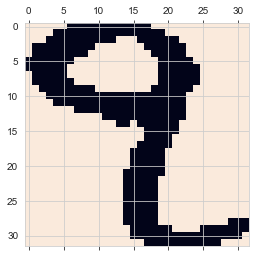

In [95]:
plt.matshow(x_train[111])

In [96]:
x_train.shape

(1000, 32, 32)

In [97]:
#Scaling the data
x_train = x_train/255
x_test = x_test/255

In [98]:
#Flattening the data
x_train_flat = x_train.reshape(len(x_train),32*32)
x_test_flat = x_test.reshape(len(x_test),32*32)

In [99]:
x_train_flat.shape

(1000, 1024)

In [100]:
#Creating a simple neural network (without any hidden layer)


model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(1024,) , activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 1.4652 - accuracy: 0.5610
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.9000
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.9320
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.9470
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.9610


In [101]:
model.evaluate(x_test_flat,y_test)

6/6 [==============================] - 0s 997us/step - loss: 0.3702 - accuracy: 0.8933


[0.3702394664287567, 0.8932584524154663]

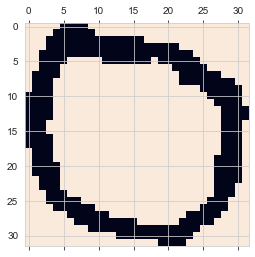

In [102]:
#Prediction test
plt.matshow((x_test[0]))

In [103]:
y_prediction = model.predict(x_test_flat)
y_prediction[0]

6/6 [==============================] - 0s 798us/step


array([0.9947816 , 0.3708585 , 0.44862112, 0.10684846, 0.19478726,
       0.1688925 , 0.04583758, 0.28237212, 0.38704246, 0.19693345],
      dtype=float32)

In [104]:
np.argmax(y_prediction[1])
#We are getting correct result

0

In [105]:
y_predicted_labels = [np.argmax(i) for i in y_prediction]

In [106]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0, 14,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  3, 12,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 17,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  0, 18]])>

Text(70.0, 0.5, 'Actual')

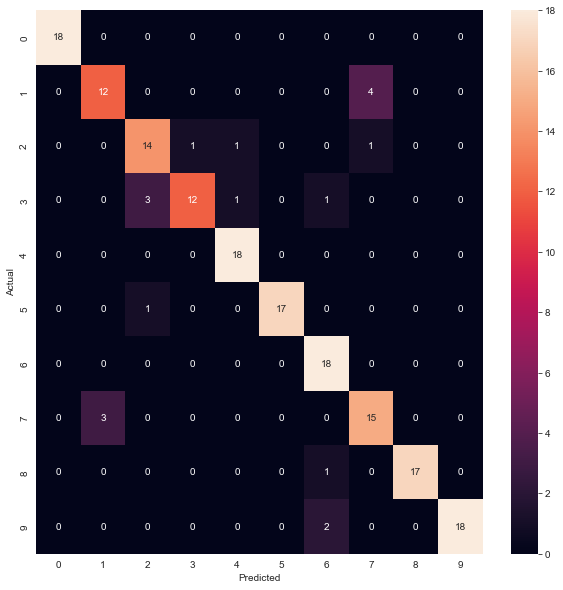

In [107]:
plt.figure(figsize = (10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Now Adding a Hidden layer testing the same

In [130]:
import numpy as np

class Dense:
    def __init__(self, units, input_dim, activation=None):
        self.units = units
        self.input_dim = input_dim
        self.activation = activation

        self.W = np.random.randn(input_dim, units) * np.sqrt(1 / input_dim)
        self.b = np.zeros((1, units))

    def forward(self, X):
        self.Z = np.dot(X, self.W) + self.b

        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-self.Z))
        elif self.activation == 'softmax':
            expZ = np.exp(self.Z - np.max(self.Z, axis=1, keepdims=True))
            return expZ / np.sum(expZ, axis=1, keepdims=True)
        else:
            return self.Z

    def backward(self, X, dZ):
        dW = np.dot(X.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)
        dX = np.dot(dZ, self.W.T)
        return dW, db, dX

class Sequential:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, X, y):
        dZ = self.loss.backward(self.output, y)
        for layer in reversed(self.layers):
            dW, db, dZ = layer.backward(layer.input, dZ)
            layer.W -= self.lr * dW
            layer.b -= self.lr * db

    def compile(self, optimizer, loss, metrics):
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics

    def fit(self, X, y, epochs, batch_size):
        self.lr = self.optimizer.lr
        self.batch_size = batch_size

        for i in range(epochs):
            epoch_loss = 0.0
            epoch_accuracy = 0.0

            for j in range(0, X.shape[0], batch_size):
                batch_X = X[j:j+batch_size]
                batch_y = y[j:j+batch_size]

                self.output = self.forward(batch_X)
                epoch_loss += self.loss.forward(self.output, batch_y)
                epoch_accuracy += np.sum(np.argmax(self.output, axis=1) == batch_y)

                self.backward(batch_X, batch_y)

            epoch_loss /= X.shape[0]
            epoch_accuracy /= X.shape[0]

            print(f'Epoch {i+1}/{epochs} - loss: {epoch_loss:.4f} - accuracy: {epoch_accuracy:.4f}')


